## Python statistics essential training - 05_04_crossvalidation

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

Loading gapminder data for year 1985 (Live Aid!).

In [6]:
gapminder = pd.read_csv('gapminder.csv')

In [7]:
gdata = gapminder.query('year == 1985')

Refactored plotting so that it works on arbitrary datasets.

In [8]:
def sc(data):
    return 1e-6 * data.population, data.region.map({'Africa': 'skyblue', 'Europe': 'gold',
                                                   'America': 'palegreen', 'Asia': 'coral'})

def plotdata(data=gdata):
    size, colors = sc(data)
    data.plot.scatter('age5_surviving','babies_per_woman',
                      c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)
                      
def plotfit(fit,data=gdata):
    plotdata(data)

    size, colors = sc(data)
    pp.scatter(data.age5_surviving,fit.predict(data),
               c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

Model formulas from the last two videos

In [9]:
f_groupmeans = 'babies_per_woman ~ -1 + region'
f_surviving = 'babies_per_woman ~ -1 + region + age5_surviving'
f_srp = ('babies_per_woman ~ -1 + region + age5_surviving'
         '+ age5_surviving:region - age5_surviving + population')

In [12]:
shuffled = gdata.sample(len(gdata)) # with out replacement

In [14]:
training, testing = shuffled.iloc[:len(gdata)//2], shuffled.iloc[len(gdata)//2:] # iloc goes by rownumber.

In [16]:
surviving = smf.ols(f_surviving, data = training).fit()

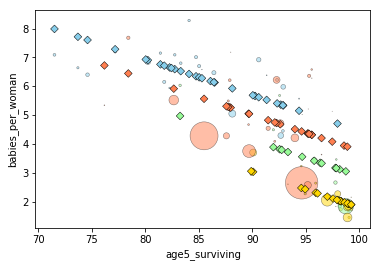

In [18]:
plotfit(surviving, training)

In [20]:
surviving.mse_resid

0.8727643892297992

In [22]:
resid = surviving.predict(testing) - testing.babies_per_woman # prediction - observed
df = len(testing) - surviving.df_model - 1 # 
np.sum(resid**2)/df

1.0982775028181904

In [24]:
surviving.df_model

4.0

In [28]:
testing.shape

(91, 9)

In [29]:
def cross_validate(data, formula, response, n=100):
    ret = []
    for i in range(n):
        shuffled = gdata.sample(len(gdata)) # create a random set of samples.
        
        training, testing = shuffled.iloc[:len(gdata)//2], shuffled.iloc[len(gdata)//2:] # split
        
        trained_model = smf.ols(formula, data = training).fit() # Train
        
        # Computer mean squred error 
        resid = trained_model.predict(testing) - testing[response] 
        df = len(testing) - surviving.df_model - 1 # 
        mse = np.sum(resid**2)/df
        ret.append(mse)
        
    return np.mean(ret)

In [30]:
cross_validate(gdata, f_groupmeans, 'babies_per_woman')

1.660036686123811

In [31]:
cross_validate(gdata, f_surviving, 'babies_per_woman')

1.050698432255533

In [32]:
cross_validate(gdata, f_srp, 'babies_per_woman')

1.1737061170372656

In [ ]:
# The model of intermediate complexity (surviving) is good in the set of models.